# : Telco Customer Churn.

1. Demographic:
a. Which 2 demographics have proven to be the most popular with the telco brand?


b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


In [3]:
# Read data
TelcoChurn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [46]:
TelcoChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
TelcoChurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [49]:
TelcoChurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# MissingValue

In [50]:
TelcoChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
TelcoChurn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
TelcoChurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
TelcoChurn.TotalCharges = pd.to_numeric(TelcoChurn.TotalCharges, errors='coerce')
TelcoChurn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
#Removing missing values 
TelcoChurn.dropna(inplace = True)

#Remove customer IDs from the data set

TelcoChurn2 = TelcoChurn.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable

TelcoChurn2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
TelcoChurn2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(TelcoChurn2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
TelcoChurn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


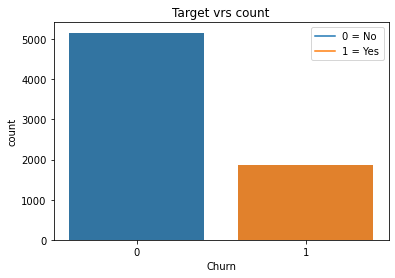

In [32]:
sns.countplot(TelcoChurn2['Churn'])
plt.plot(0, label ="0 = No")
plt.plot(1, label ="1 = Yes")
plt.xlabel("Churn")
plt.ylabel("count")
plt.title("Target vrs count")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Churn demographics-gender')

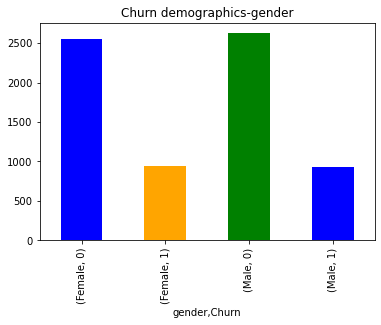

In [85]:


TelcoChurn2.groupby('gender').Churn.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Churn demographics-gender")



Text(0.5, 1.0, 'Churn demographics- Seniorcitizen')

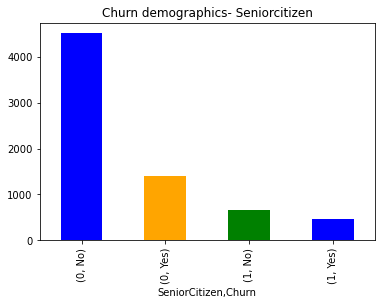

In [59]:
TelcoChurn2.groupby('SeniorCitizen').Churn.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Churn demographics- Seniorcitizen")

Text(0.5, 1.0, 'Churn demographics- Partner')

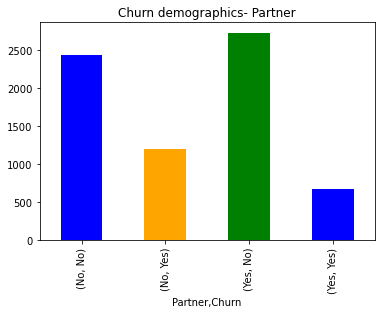

In [60]:
TelcoChurn2.groupby('Partner').Churn.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Churn demographics- Partner")

Text(0.5, 1.0, 'Churn demographics- Dependents')

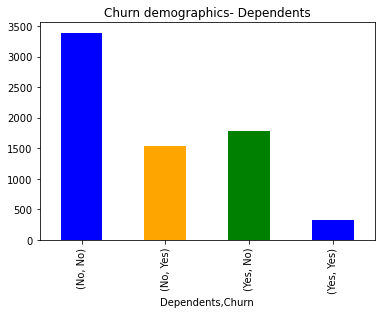

In [61]:
TelcoChurn2.groupby('Dependents').Churn.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Churn demographics- Dependents")

Text(0.5, 1.0, 'Churn demographics- Dependents')

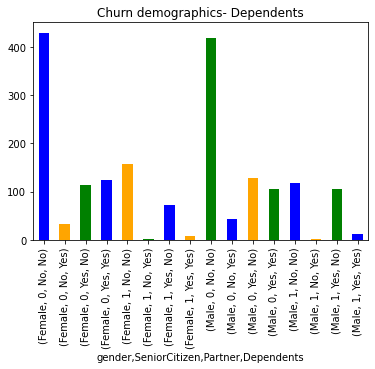

In [64]:
#b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?


Demo= TelcoChurn2[TelcoChurn2['Churn']==1].groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])['Churn'].count().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Churn demographics- Dependents")
    
#Demo.nlargest(2)

2. Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)
b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [65]:
TelcoChurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

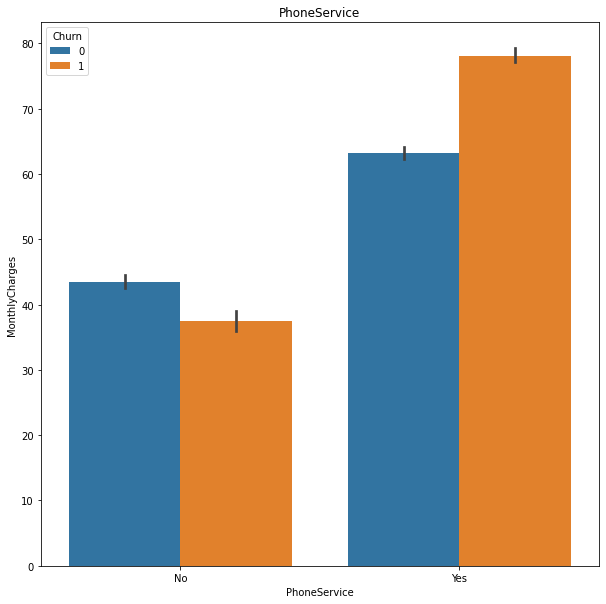

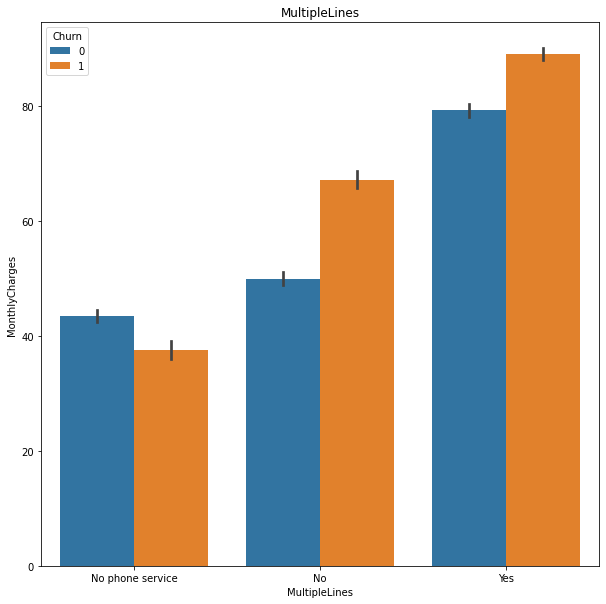

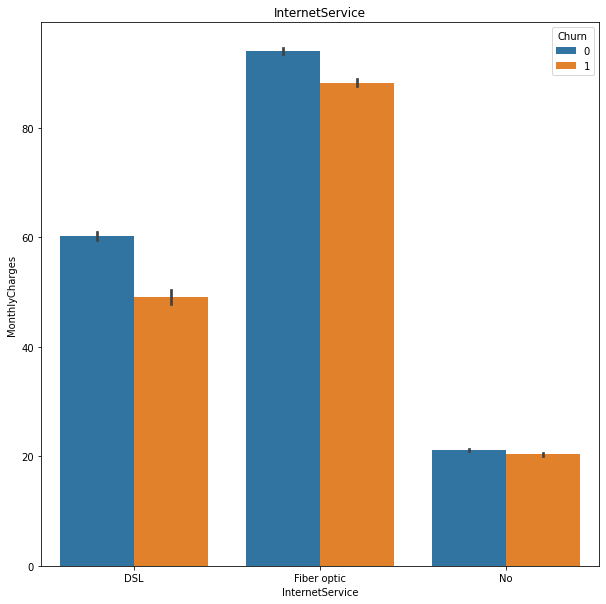

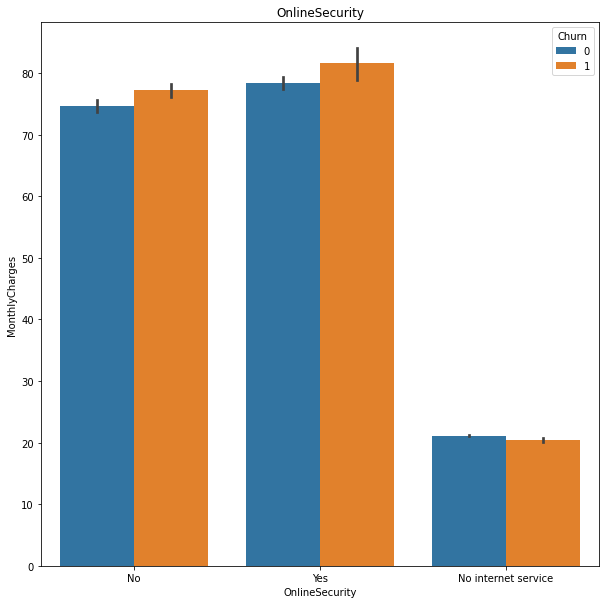

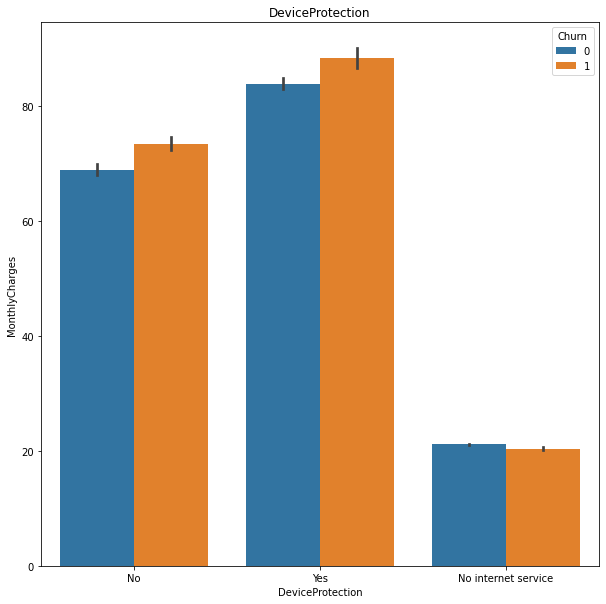

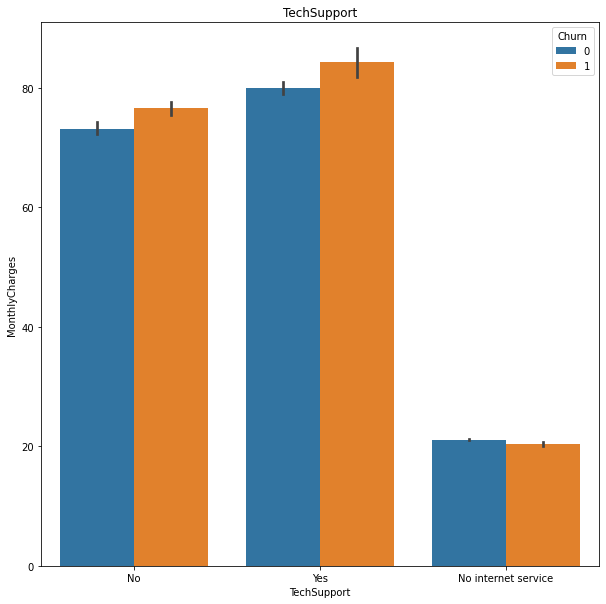

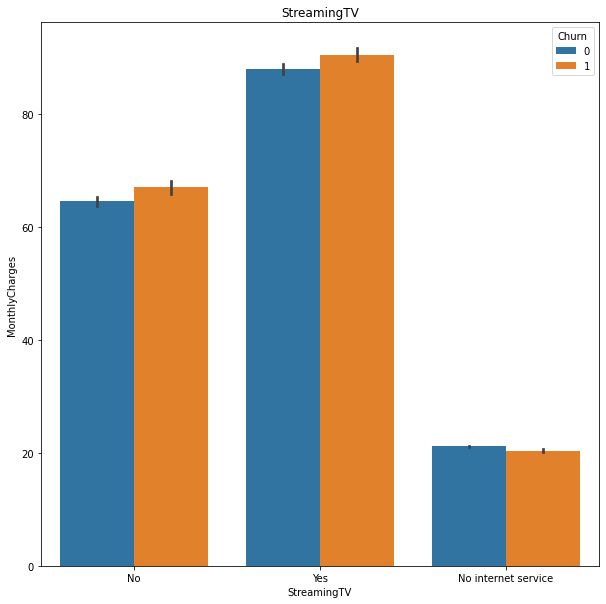

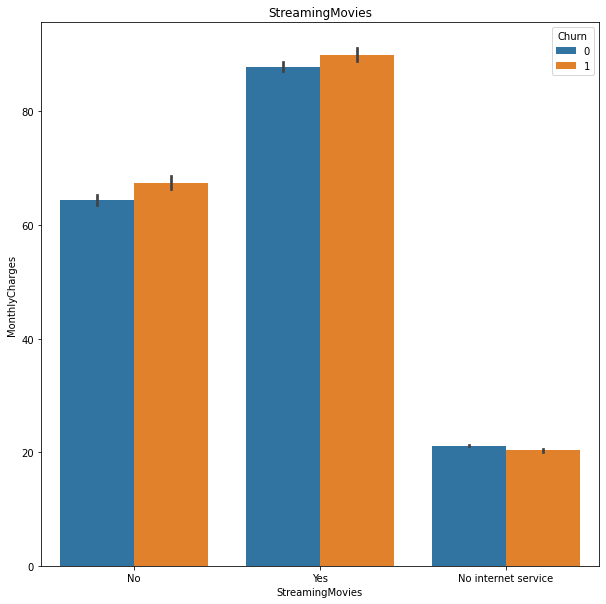

In [5]:

services = ['PhoneService' , 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection' , 'TechSupport', 'StreamingTV' , 'StreamingMovies'] 

for service in services:
    plt.gcf().set_size_inches (10,10, forward = True)
    sns.barplot (x= service ,  y= 'MonthlyCharges', data =TelcoChurn2, hue = "Churn")
    plt.title (service)
    plt.show()

Text(0.5, 1.0, 'Contract')

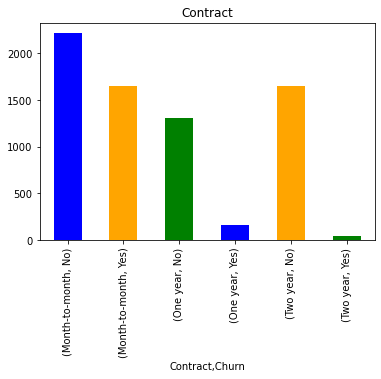

In [74]:
#b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

TelcoChurn.groupby('Contract').Churn.value_counts().plot(kind='bar',color=['Blue','Orange','Green'])
plt.title("Contract")

In [82]:
TelcoChurn2[TelcoChurn2['Churn']==1].groupby(['Contract'])['Contract'].count()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [ ]:
# 3. Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic
ii. Plus
iii. Premium
b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

<AxesSubplot:xlabel='MonthlyCharges'>

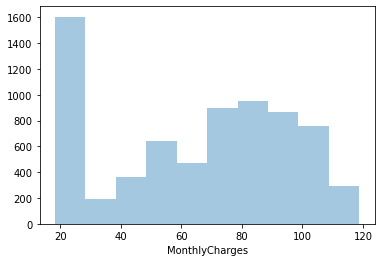

In [9]:
#a. If the company was to streamline all its services into 3 bouquet packages,
#what monthly prices will be appropriate for the following packages to keep customers from churning:
i. Basic = 20 
ii. Plus=80
iii. Premium =30

sns.distplot(TelcoChurn2['MonthlyCharges'], kde=False, bins=10)



In [10]:
#b
TelcoChurn2.groupby(["PaperlessBilling"])['Churn'].count()

PaperlessBilling
No     2872
Yes    4171
Name: Churn, dtype: int64